# Wuhan Coronavirus data

Sve češće u medijima viđamo vrlo ažurne vizuelizacije aktuelnih dešavanja bazirane na javno dosupnim podacima, kao što su npr. broj Đokovićevih osvojenih teniskih turnira ili ekonomski efekti BREXIT-a. Od početka ove 2020. godine posebno je značajna epidemija Korona virusa. Na stranici [2019-nCoV Global Cases by Johns Hopkins CSSE](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) data je vizuelizacija najvažnijih podataka u vezi sa epidemijom koja se ažurira na svakih nekoliko sati. Podaci na osnovu kojih je urađena vizuelizacija su prikupljeni iz više javno dostupnih izvora i objavljeni na najjednostavniji način. U donjem desnom uglu dešborda dat je link za [google spreadsheet](https://docs.google.com/spreadsheets/d/1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM/htmlview?usp=sharing&sle=true) gde se kod svake nove objave dodaje po jedan tab sa podacima. Ovi podaci nisu idealno složeni jer se tokom vremena menjala ideja šta sve treba da bude u tabeli, ali su najvažniji podaci ipak konzistentno predstavljeni. Nadam se da će biti i u trenutku kada ih budete koristili.
![Spread of Coronavirus in China](https://upload.wikimedia.org/wikipedia/en/3/31/Spread_of_Wuhan_Coronavirus_in_China.png)

Tabela dozvoljava kopiranje podataka, ali ne i sasvim jednostavno preuzimanje. Prosto nema dugmenceta "download". To je lako rešivo ako malo modifikujemo URL sa kog preuzimamo podatke. Format koji nam omogućuje preuzimanje podataka treba da ima oblik:
```
"https://spreadsheets.google.com/feeds/download/spreadsheets/Export?key=" + key + "&exportFormat=csv"
```
Key je ona najnaduža alfanumerička sekvenca između dve kose crte u URL-u. U ovom konkretnom slučaju to je `1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM`. Konačno, adresa koja nam omogućava preuzimanje je 
https://spreadsheets.google.com/feeds/download/spreadsheets/Export?key=1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM&exportFormat=csv.



Da bismo obradili i prikazali podatke potrebne su nam neke Pajtonove biblioteke: pandas i matplotlib. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Adresu sa koje treba preuzmemo podatke stavljamo i google_sheet_url i podatke učitavamo u data frame koristeći pandas funkciju read_csv.

In [2]:
google_sheet_url = "https://spreadsheets.google.com/feeds/download/spreadsheets/Export?key=1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM&exportFormat=csv"

In [3]:
df=pd.read_csv(google_sheet_url)

Funkcija `head()` prikazuje nekoliko prvih redova tabele, odnosno data frame strukture.

In [4]:
# ovo bi trebalo da prikaže zaglavlje tabele
df.head()

,Province/State,Country/Region,Last Update (UTC),Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2/2/2020 23:43,11177,350,295
1,Zhejiang,Mainland China,2/3/2020 1:33,724,0,36
2,Guangdong,Mainland China,2/3/2020 1:33,683,0,15
3,Henan,Mainland China,2/3/2020 1:03,566,2,14
4,Hunan,Mainland China,2/3/2020 1:33,521,0,16


Postoji šansa da ovo neće raditi u trenutku kad budete probali, tj. da ne dobijete preglednu tabelu sa podacima. Tako je to sa podacima koje na volonterskoj osnovi istovremeno uređuje veliki broj ljudi. Danas radi, ali sutra možda neće. Stalno menjaju strukturu, dodaju komentare gde ne treba... Nije problem. Ako niste u stanju ili nemate vremena da sređujete tabelu pre učitavanja, uzmite onu verziju koja je u repozitorijumu `Coronavirus data 2020-02-02.csv`.

In [5]:
df=pd.read_csv('Coronavirus data 2020-02-02.csv')

Da vidimo sad kolika nam je ova tabela, koliko tu ima vrsta i koliko kolona. Funkcija shape će nam to prikazati.

In [6]:
df.shape

(67, 6)

Ne bi bilo loše da izaberemo šta nas najviše interesuje za prikaz. Ovo što sledi je prikaz broja zaraženih za kineske provincije u kojima ih ima najviše.

Prvo biramo indeksnu kolonu. To je ona po kojoj pregledamo i označavamo podatke. U ovom slučaju to je provincija ili država.

In [7]:
df.index=df['Province/State']

Kôd u nastavku nije previše komplikovan, ali nema potrebe da ga sad analiziramo. Prosto ga upotrebite i dobićete grafički prikaz gde zaraženih ima najviše. Crni deo trake prikazuje koliko je njih do sada umrlo.

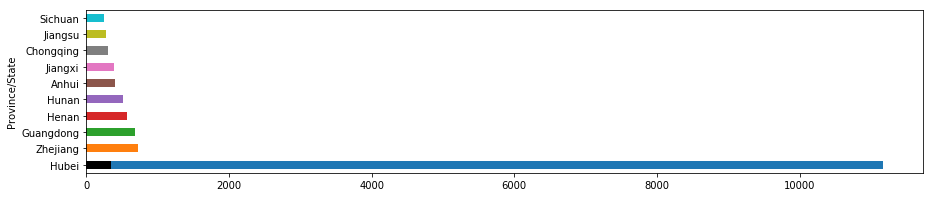

In [8]:
df=df.sort_values('Confirmed',ascending=False)
plt.figure(figsize=(15,3))
df['Confirmed'].head(10).plot(kind="barh")
df['Deaths'].head(10).plot(kind="barh",color='black')

Sada da vidimo kako se situacija menjala sa vremenom. To ne možemo da izvučemo iz samo jedne tabele. Potrebne su nam sve koje se nalaze u onom google sheet-u. Da ne bismo skidali stranu po stranu, bolje je da skinemo Excel fajl iz koga ćemo posle uzimati posebne tabove.

Slično, za preuzimanje svih tabova kao Excel fajla koristimo URL na čijem je kraju umesto csv xlsx: https://spreadsheets.google.com/feeds/download/spreadsheets/Export?key=1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM&exportFormat=xlsx. Ako format na vebu ne bude odgovarajući kad ga budete koristili, uzmite verziju iz repozitorijuma `Coronavirus data 2020-02-02.xlsx`.

In [9]:
google_sheet_url = "https://spreadsheets.google.com/feeds/download/spreadsheets/Export?key=1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM&exportFormat=xlsx"

df=pd.read_excel(google_sheet_url)

Sad iz fajla koji smo preuzeli čitamo pojedinačne tabove i sve te tabele spajamo u jednu veliku. Nadamo se samo da će Pajton znati kako da poveže tabele koje verovatno nemaju istu strukturu.

In [10]:
n=20
df=pd.read_excel('Coronavirus data 2020-02-02.xlsx',sheet_name=n)
for i in range(1,n):
    dfi=pd.read_excel('Coronavirus data 2020-02-02.xlsx',sheet_name=i)
    df=pd.concat([df,dfi])

In [11]:
df.head()

,Confirmed,Country/Region,Deaths,Last Update,Province/State,"Quick note: Starting from this tab, our map is updating (almost) in real time (China data - at least once per hour; non China data - several times per day). This table is planning to be updated twice a day. The discrepancy between the map and this sheet is expected. Sorry for any confusion and inconvenience.",Recovered,Suspected,Unnamed: 6,Unnamed: 7
0,1052.0,Mainland China,52.0,2020-01-25 22:00:00,Hubei,NaN,42.0,NaN,NaN,NaN
1,104.0,Mainland China,NaN,2020-01-25 22:00:00,Zhejiang,NaN,1.0,NaN,NaN,NaN
2,98.0,Mainland China,NaN,2020-01-25 12:00:00,Guangdong,NaN,2.0,NaN,NaN,NaN
3,83.0,Mainland China,1.0,2020-01-25 12:00:00,Henan,NaN,NaN,3.0,NaN,NaN
4,75.0,Mainland China,NaN,2020-01-25 12:00:00,Chongqing,NaN,NaN,NaN,NaN,NaN


Očigledno postoje kolone koje nemaju mnogo smisla, ali nam trenutno ne smetaju.

Grafici koje uglavnom viđamo ne prikazuju koliko se problem sa Koronavirusom razlikuje po regijama i gradovima u Kini. Čini se da su skoro svi zaraženi samo u jednoj provinciji. Zato ćemo iz velike tabele izdvojiti posebne tabele za nekoliko provincija i prikazati broj ukupan zaraženih po datumima.

In [12]:
dfH=df.loc[df['Province/State']=='Hubei',].sort_values('Last Update')
dfZ=df.loc[df['Province/State']=='Zhejiang',].sort_values('Last Update')
dfG=df.loc[df['Province/State']=='Guangdong',].sort_values('Last Update')
dfB=df.loc[df['Province/State']=='Beijing',].sort_values('Last Update')

Text(0,0.5,'Broj zaraženih')

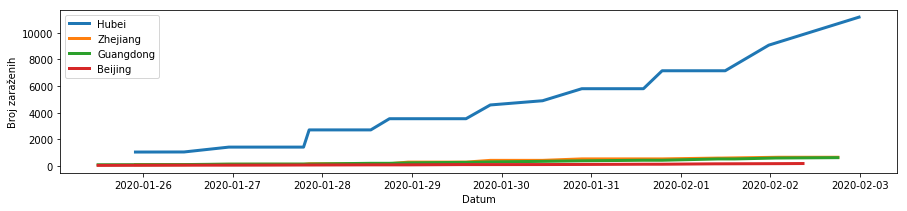

In [13]:
plt.figure(figsize=(15,3))
plt.plot(dfH['Last Update'], dfH['Confirmed'], label='Hubei',linewidth=3)
plt.plot(dfZ['Last Update'], dfZ['Confirmed'], label='Zhejiang',linewidth=3)
plt.plot(dfG['Last Update'], dfG['Confirmed'], label='Guangdong',linewidth=3)
plt.plot(dfB['Last Update'], dfB['Confirmed'], label='Beijing',linewidth=3)

plt.legend()
plt.xlabel('Datum')
plt.ylabel('Broj zaraženih')

Grafik koji retko viđamo u medijima i kako menja odnos broja umrlih i oporavljenih. Prvi znak da epidemija gubi na intenzitetu bi mogao da bude trenutak kada broj oporavljenih nadmaši broj umrlih. Pogledajmo kako to izgleda u u najkritičnijoj provinciji Hubei.

Text(0.5,0,'Datum')

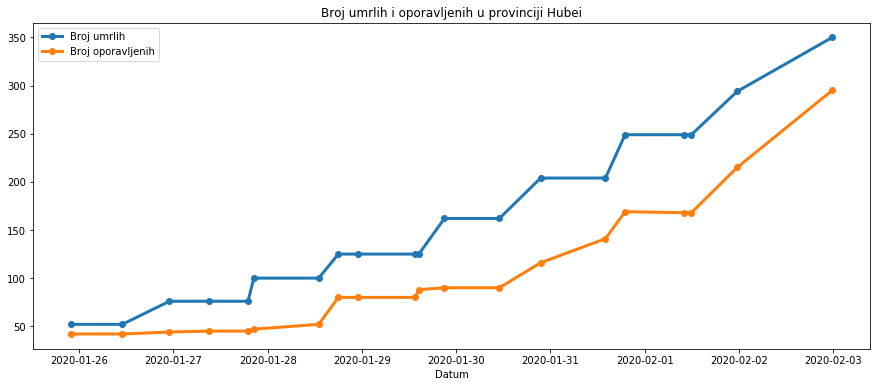

In [14]:
plt.figure(figsize=(15,6))
plt.title('Broj umrlih i oporavljenih u provinciji Hubei')
plt.plot(dfH['Last Update'], dfH['Deaths'], label='Broj umrlih',marker='o',linewidth=3)
plt.plot(dfH['Last Update'], dfH['Recovered'], label='Broj oporavljenih',marker='o',linewidth=3)
plt.legend()
plt.xlabel('Datum')